In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 60)
pd.__version__
import re

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading the csv files
def read_csv(filename):
    try:
        df = pd.read_csv(filename, header=1)
    except Exception as e:
        df='chrysoula'
        print(f"cannot read {filename}. Error: {e}")
    return df

In [3]:
def read_all_csv(path):
    ''' This function:
     - reads all the data of droughts
     - concatenates them
     - removes unwanted columns
     - turns strings into numbers
     '''
    # this is where we'll save all the dataframes when we read them
    list_of_dfs = []
       
    # lists the files of the path
    files = os.listdir(path)
    
    # filters the files we want to read
    csv_files = [f for f in files if f.endswith('.csv')]
    
    # loop through the files
    for file in csv_files:
        
        list_of_name = file
#         prints message for us to see the progress
        df = pd.read_csv(f"{path}/{file}") 
#         creates column with the name of the file
        df['file_name']= list_of_name
#         puts it in the list
        list_of_dfs.append(df)
  
    # concatenate all dataframes
    greece = pd.concat(list_of_dfs).reset_index(drop=True)
       
    return greece

In [4]:
def date_to_year(df):
    '''
    turns the column of dates into years,
    keeps only October,
    and returns the clean df
    '''
    
# making a new column with datetime data and keeping only October
    df = df[pd.to_datetime(df['DATA'], format='%b%Y').dt.month == 10].copy()
    
# keeping only the year   
    df['year'] = pd.to_datetime(df['DATA'], format='%b%Y').dt.year
       
# cleaning the dataset from the unwanted column
    df = df[['year','SPEI_12','file_name']].reset_index(drop=True).copy() 
    
    return df

In [5]:
def extract_coordinates(df):
    '''
    extracts the coordinates in the filename,
    returns two columns with latitude and longtitude
    '''
    df['lat'] = df.file_name.str.extract(r'(\d+[.]\d+)_\d+[.]').astype(float)

    df['long'] = df.file_name.str.extract(r'\d+[.]\d+_(\d+[.]\d+)').astype(float) 

    new_df = df[['year','SPEI_12','lat','long']].copy()

    return new_df

In [6]:
def find_stats(df):
    '''
    finds the median, mean and makes a new dataframe
    '''
    
    df_stat = df.groupby('year').agg({'SPEI_12': ['median', 'mean']}).reset_index().copy()
    
    df_stat.columns = list(map(''.join, df_stat.columns.values))
    
    df_stat = df_stat.reset_index().drop(['index'], axis=1)
    
    return df_stat

In [7]:
# Uploading the files for Greece
gr_df = read_all_csv("C:\\Users\\c.marinou\\Documents\\GitHub\\wildfires_drought\\datasets_spei\\Greece_2024")
gr_df = date_to_year(gr_df)
gr_df = extract_coordinates(gr_df) 
gr_df.tail()

,year,SPEI_12,lat,long
16571,2019,-0.25396,41.25,26.75
16572,2020,-1.41438,41.25,26.75
16573,2021,1.40266,41.25,26.75
16574,2022,-0.62418,41.25,26.75
16575,2023,-1.93421,41.25,26.75


In [8]:
gr_stats = find_stats(gr_df)

In [9]:
# finds the difference between the median values for each year
gr_stats['value_dif'] = gr_stats['SPEI_12median'].diff()
gr_stats

,year,SPEI_12median,SPEI_12mean,value_dif
0,1950,NaN,NaN,NaN
1,1951,0.886975,0.729504,NaN
2,1952,-0.707055,-0.669552,-1.594030
3,1953,1.037110,1.040955,1.744165
4,1954,0.455455,0.504595,-0.581655
5,1955,1.235270,1.013783,0.779815
6,1956,0.279580,0.292067,-0.955690
7,1957,0.320350,0.298967,0.040770
8,1958,-0.558950,-0.567785,-0.879300
9,1959,-0.012510,0.225995,0.546440


In [10]:
# Uploading the files for Peloponnisos
pelop_df = read_all_csv("C:\\Users\\c.marinou\\Documents\\GitHub\\wildfires_drought\\datasets_spei\\EastPelop_2024")
pelop_df = date_to_year(pelop_df)
pelop_df = extract_coordinates(pelop_df) 

In [11]:
pelop_stats = find_stats(pelop_df)
pelop_stats['value_dif'] = pelop_stats['SPEI_12median'].diff()
pelop_stats

,year,SPEI_12median,SPEI_12mean,value_dif
0,1950,NaN,NaN,NaN
1,1951,1.19577,0.802660,NaN
2,1952,-0.48797,-0.501590,-1.68374
3,1953,1.05265,1.128587,1.54062
4,1954,0.61461,0.265967,-0.43804
5,1955,1.39638,1.247478,0.78177
6,1956,-0.08502,-0.068444,-1.48140
7,1957,0.39314,0.209628,0.47816
8,1958,-0.55359,-0.582073,-0.94673
9,1959,0.25331,0.158116,0.80690


In [12]:
# Uploading the files for Evoia and Attiki 
# the areas are too small to consider as different 
evoia_attiki_df = read_all_csv("C:\\Users\\c.marinou\\Documents\\GitHub\\wildfires_drought\\datasets_spei\\Attiki_Evoia")
evoia_attiki_df = date_to_year(evoia_attiki_df)
evoia_attiki_df = extract_coordinates(evoia_attiki_df) 

In [13]:
evoia_attiki_stats = find_stats(evoia_attiki_df)
evoia_attiki_stats['value_dif'] = evoia_attiki_stats['SPEI_12median'].diff()
evoia_attiki_stats

,year,SPEI_12median,SPEI_12mean,value_dif
0,1950,NaN,NaN,NaN
1,1951,0.25173,0.437359,NaN
2,1952,-0.88382,-0.822791,-1.13555
3,1953,1.72418,1.757863,2.60800
4,1954,0.46672,0.244596,-1.25746
5,1955,1.77302,1.528696,1.30630
6,1956,-0.15000,-0.104391,-1.92302
7,1957,-0.26011,-0.317183,-0.11011
8,1958,-0.65652,-0.622297,-0.39641
9,1959,-0.17550,-0.166259,0.48102


In [37]:
# Uploading the files for Evros
evros_df = pd.read_csv("C:\\Users\\c.marinou\\Documents\\GitHub\\wildfires_drought\\datasets_spei\\Evros.csv")

evros_df = evros_df[pd.to_datetime(evros_df['DATA'], format='%b%Y').dt.month == 10].copy()
# keeping only the year   
evros_df['year'] = pd.to_datetime(evros_df['DATA'], format='%b%Y').dt.year      
# cleaning the dataset from the unwanted column
evros_df = evros_df[['year','SPEI_12']].reset_index(drop=True).copy() 

evros_df.tail()

,year,SPEI_12
69,2019,-0.25396
70,2020,-1.41438
71,2021,1.40266
72,2022,-0.62418
73,2023,-1.93421


In [38]:
evros_stats = find_stats(evros_df)
evros_stats['value_dif'] = evros_stats['SPEI_12median'].diff()
evros_stats 

,year,SPEI_12median,SPEI_12mean,value_dif
0,1950,NaN,NaN,NaN
1,1951,-0.07693,-0.07693,NaN
2,1952,-1.04825,-1.04825,-0.97132
3,1953,1.95941,1.95941,3.00766
4,1954,-0.52777,-0.52777,-2.48718
5,1955,1.71982,1.71982,2.24759
6,1956,0.70895,0.70895,-1.01087
7,1957,0.06150,0.06150,-0.64745
8,1958,-0.34117,-0.34117,-0.40267
9,1959,-0.35028,-0.35028,-0.00911


In [39]:
# Uploading the files for Ipeiros
ipeiros_df = pd.read_csv("C:\\Users\\c.marinou\\Documents\\GitHub\\wildfires_drought\\datasets_spei\\Ipeiros.csv")

ipeiros_df = ipeiros_df[pd.to_datetime(ipeiros_df['DATA'], format='%b%Y').dt.month == 10].copy()
# keeping only the year   
ipeiros_df['year'] = pd.to_datetime(ipeiros_df['DATA'], format='%b%Y').dt.year      
# cleaning the dataset from the unwanted column
ipeiros_df = ipeiros_df[['year','SPEI_12']].reset_index(drop=True).copy() 

ipeiros_df.tail()

,year,SPEI_12
69,2019,-1.74096
70,2020,-0.34402
71,2021,0.34489
72,2022,-1.50334
73,2023,-1.40030


In [40]:
ipeiros_stats = find_stats(ipeiros_df)
ipeiros_stats['value_dif'] = ipeiros_stats['SPEI_12median'].diff()
ipeiros_stats

,year,SPEI_12median,SPEI_12mean,value_dif
0,1950,NaN,NaN,NaN
1,1951,1.85714,1.85714,NaN
2,1952,-0.48189,-0.48189,-2.33903
3,1953,0.96309,0.96309,1.44498
4,1954,1.48280,1.48280,0.51971
5,1955,1.73065,1.73065,0.24785
6,1956,0.39666,0.39666,-1.33399
7,1957,0.14023,0.14023,-0.25643
8,1958,-0.21383,-0.21383,-0.35406
9,1959,1.61661,1.61661,1.83044


In [41]:
# Uploading the files for Crete
crete_df = read_all_csv("C:\\Users\\c.marinou\\Documents\\GitHub\\wildfires_drought\\datasets_spei\\Crete")
crete_df = date_to_year(crete_df)
crete_df = extract_coordinates(crete_df) 
crete_df.tail()

,year,SPEI_12,lat,long
1327,2019,1.60610,35.75,26.25
1328,2020,0.32168,35.75,26.25
1329,2021,-2.00548,35.75,26.25
1330,2022,0.46862,35.75,26.25
1331,2023,-2.90311,35.75,26.25


In [42]:
crete_stats = find_stats(crete_df)
crete_stats['value_dif'] = crete_stats['SPEI_12median'].diff()
crete_stats

,year,SPEI_12median,SPEI_12mean,value_dif
0,1950,NaN,NaN,NaN
1,1951,-1.133845,-1.158925,NaN
2,1952,-0.490110,-0.529300,0.643735
3,1953,0.567230,0.637587,1.057340
4,1954,1.614450,1.703763,1.047220
5,1955,-0.853750,-0.853726,-2.468200
6,1956,0.225245,0.317921,1.078995
7,1957,1.207620,1.318466,0.982375
8,1958,-1.195255,-1.398269,-2.402875
9,1959,0.067515,0.357588,1.262770


In [43]:
#  for the map of the whole Greece we need the year 2023
map_df= gr_df[gr_df['year'] == 2023].copy()
map_df.to_csv("greece_drought_map.csv")

# Ερωτήσεις

### Μειώθηκαν ή αυξήθηκαν τα ποσοστα ξηρασίας τα τελευταία χρόνια; Κατα πόσο;

In [44]:
greece_value = gr_stats['SPEI_12median'][gr_stats['year'] == 2023].to_list()
crete_value = crete_stats['SPEI_12median'][crete_stats['year'] == 2023].to_list()
evros_value = evros_stats ['SPEI_12median'][evros_stats['year'] == 2023].to_list()
evoia_attiki_value = evoia_attiki_stats['SPEI_12median'][evoia_attiki_stats['year'] == 2023].to_list()
pelop_value = pelop_stats['SPEI_12median'][pelop_stats['year'] == 2023].to_list()


text = f' Η μέση τιμή του δείκτη SPEI για το 2023 ήταν {greece_value} για το σύνολο της ελληνικής επικράτειας, \
{crete_value} στην Κρήτη και {evros_value} στον Έβρο,\
 ενώ ανέβηκε κατά {pelop_value} στη Πελοπόννησο, {evoia_attiki_value} στην Εύβοια και την Αττική.'

In [45]:
text

' Η μέση τιμή του δείκτη SPEI για το 2023 ήταν [-0.98248] για το σύνολο της ελληνικής επικράτειας, [-2.10345] στην Κρήτη και [-1.93421] στον Έβρο,  ενώ ανέβηκε κατά [-0.64096] στη Πελοπόννησο, [-0.89311] στην Εύβοια και την Αττική.'

In [46]:
greece_value_dif = gr_stats['value_dif'][gr_stats['year'] == 2023].to_list()
crete_value_dif = crete_stats['value_dif'][crete_stats['year'] == 2023].to_list()
evros_value_dif = evros_stats ['value_dif'][evros_stats['year'] == 2023].to_list()
evoia_attiki_value_dif = evoia_attiki_stats['value_dif'][evoia_attiki_stats['year'] == 2023].to_list()
pelop_value_dif = pelop_stats['value_dif'][pelop_stats['year'] == 2023].to_list()

text =f'Το 2023 η τιμή του δείκτη SPEI έπεσε κατά {greece_value_dif} για το σύνολο της ελληνικής επικράτειας, \
{crete_value_dif} στην Κρήτη και {evros_value_dif} στον Έβρο,\
 ενώ ανέβηκε κατά {pelop_value_dif} στη Πελοπόννησο, {evoia_attiki_value_dif} στην Εύβοια και την Αττική.'

In [26]:
text

'Το 2023 η τιμή του δείκτη SPEI έπεσε κατά [-0.19998000000000005] για το σύνολο της ελληνικής επικράτειας, [-2.6856] στην Κρήτη και [-1.31003] στον Έβρο,  ενώ ανέβηκε κατά [0.17087000000000008] στη Πελοπόννησο, [0.2946700000000001] στην Εύβοια και την Αττική.'

### Γραφήματα

Text(0.5, 0.98, '12-month average of SPEI')

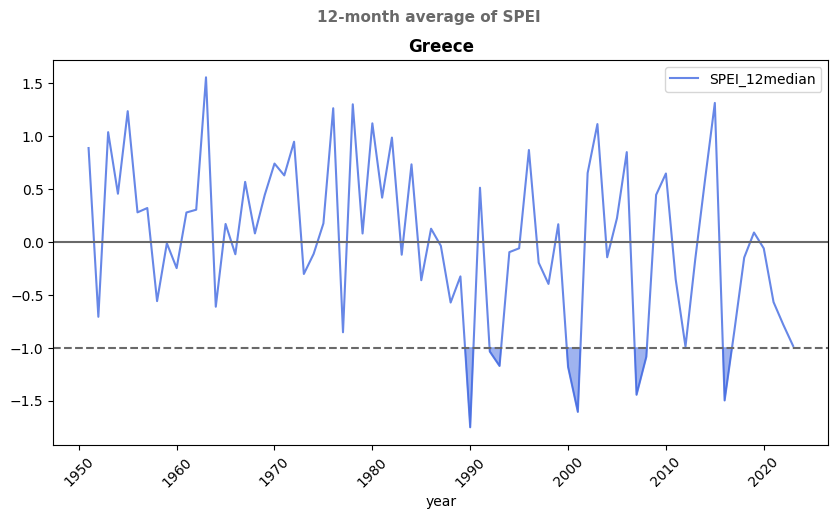

In [57]:
p12 = gr_stats.plot(x='year',y='SPEI_12median',figsize=(10,5),rot=45, color='royalblue', alpha=.8, legend=True)

y_value = -1  
p12.axhline(y=-1, color='dimgray', linestyle='--', label=f'Y = {y_value}')
p12.axhline(y=0, color='dimgray',  label=f'Y = {y_value}')


p12.fill_between(gr_stats['year'], gr_stats['SPEI_12median'], y_value, where=(gr_stats['SPEI_12median'] < y_value),
                 interpolate=True, color='royalblue', alpha=0.5)
p12.set_title('Greece', fontweight='bold')
plt.suptitle('12-month average of SPEI', fontsize=11, color='dimgray', fontweight='bold')
# p12.legend()

# plt.savefig('greece_line.png')

Text(0.5, 0.98, '12-month average of SPEI')

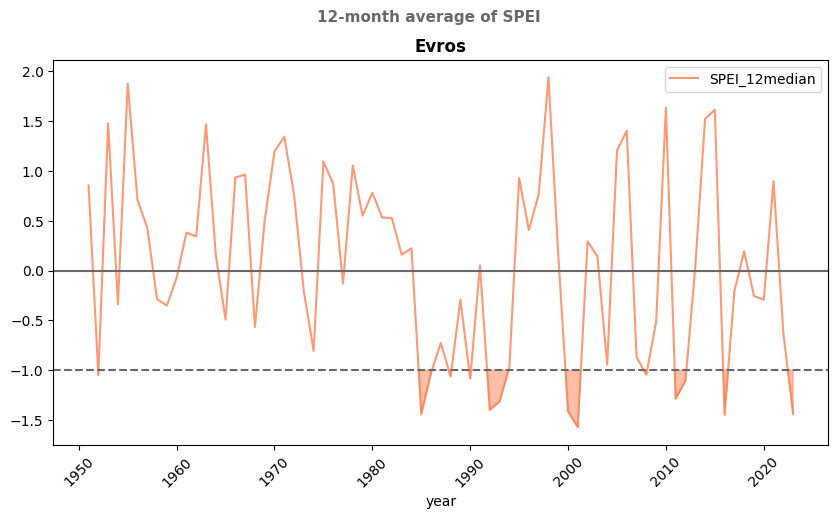

In [75]:
p12 = evros_stats.plot(x='year',y='SPEI_12median',figsize=(10,5),rot=45, color='coral', alpha=.8, legend=True)

y_value = -1  
p12.axhline(y=-1, color='dimgray', linestyle='--', label=f'Y = {y_value}')
p12.axhline(y=0, color='dimgray',  label=f'Y = {y_value}')


p12.fill_between(evros_stats['year'], evros_stats['SPEI_12median'], y_value, where=(evros_stats['SPEI_12median'] < y_value),
                 interpolate=True, color='coral', alpha=0.5)
p12.set_title('Εvros', fontweight='bold')
plt.suptitle('12-month average of SPEI', fontsize=11, color='dimgray', fontweight='bold')
# p12.legend()

# plt.savefig('greece_line.png')

Text(0.5, 0.98, '12-month average of SPEI')

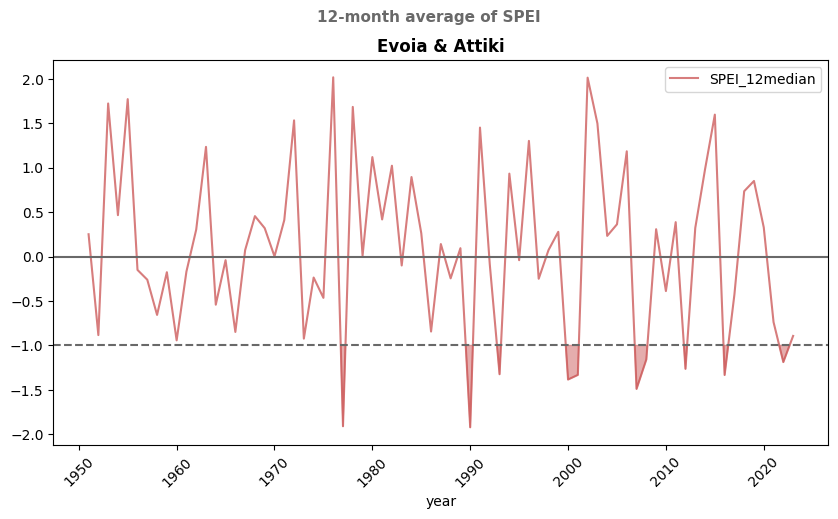

In [74]:
p12 = evoia_attiki_stats.plot(x='year',y='SPEI_12median',figsize=(10,5),rot=45, color='indianred', alpha=.8, legend=True)

y_value = -1  
p12.axhline(y=-1, color='dimgray', linestyle='--', label=f'Y = {y_value}')
p12.axhline(y=0, color='dimgray',  label=f'Y = {y_value}')


p12.fill_between(evoia_attiki_stats['year'], evoia_attiki_stats['SPEI_12median'], y_value, where=(evoia_attiki_stats['SPEI_12median'] < y_value),
                 interpolate=True, color='indianred', alpha=0.5)
p12.set_title('Evoia & Attiki', fontweight='bold')
plt.suptitle('12-month average of SPEI', fontsize=11, color='dimgray', fontweight='bold')
# p12.legend()

# plt.savefig('greece_line.png')

Text(0.5, 0.98, '12-month average of SPEI')

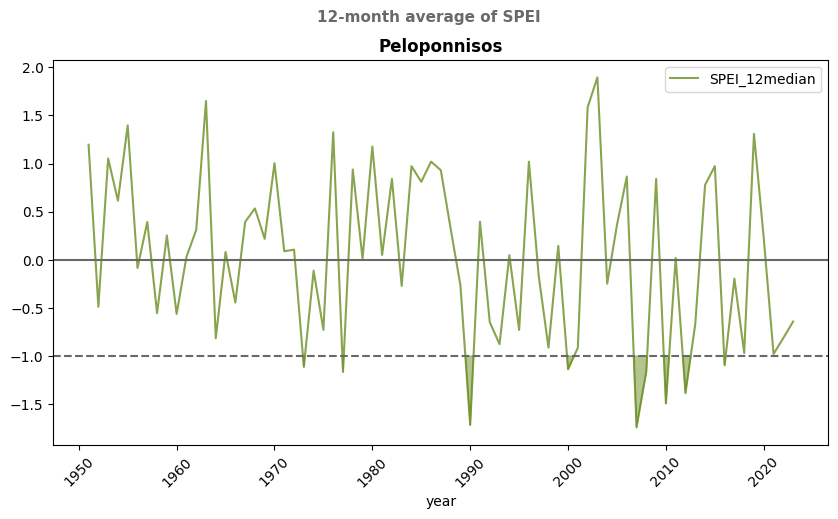

In [72]:
p12 = pelop_stats.plot(x='year',y='SPEI_12median',figsize=(10,5),rot=45, color='olivedrab', alpha=.8, legend=True)

y_value = -1  
p12.axhline(y=-1, color='dimgray', linestyle='--', label=f'Y = {y_value}')
p12.axhline(y=0, color='dimgray',  label=f'Y = {y_value}')


p12.fill_between(pelop_stats['year'], pelop_stats['SPEI_12median'], y_value, where=(pelop_stats['SPEI_12median'] < y_value),
                 interpolate=True, color='olivedrab', alpha=0.5)
p12.set_title('Peloponnisos', fontweight='bold')
plt.suptitle('12-month average of SPEI', fontsize=11, color='dimgray', fontweight='bold')
# p12.legend()

# plt.savefig('greece_line.png')

Text(0.5, 0.98, '12-month average of SPEI')

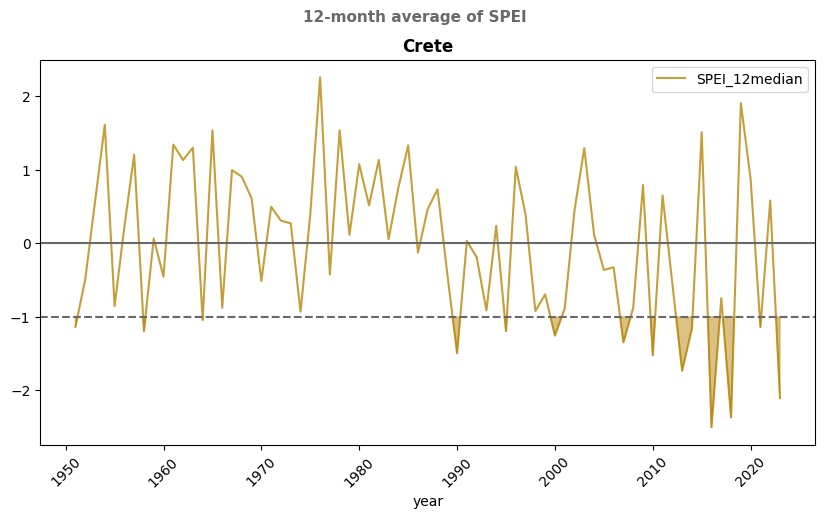

In [73]:
p12 = crete_stats.plot(x='year',y='SPEI_12median',figsize=(10,5),rot=45, color='darkgoldenrod', alpha=.8, legend=True)

y_value = -1  
p12.axhline(y=-1, color='dimgray', linestyle='--', label=f'Y = {y_value}')
p12.axhline(y=0, color='dimgray',  label=f'Y = {y_value}')


p12.fill_between(crete_stats['year'], crete_stats['SPEI_12median'], y_value, where=(crete_stats['SPEI_12median'] < y_value),
                 interpolate=True, color='darkgoldenrod', alpha=0.5)
p12.set_title('Crete', fontweight='bold')
plt.suptitle('12-month average of SPEI', fontsize=11, color='dimgray', fontweight='bold')
# p12.legend()

# plt.savefig('greece_line.png')